/tmp/ipykernel_73983/954196460.py:28: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:,:,0], X_test, feature_names=features_names)


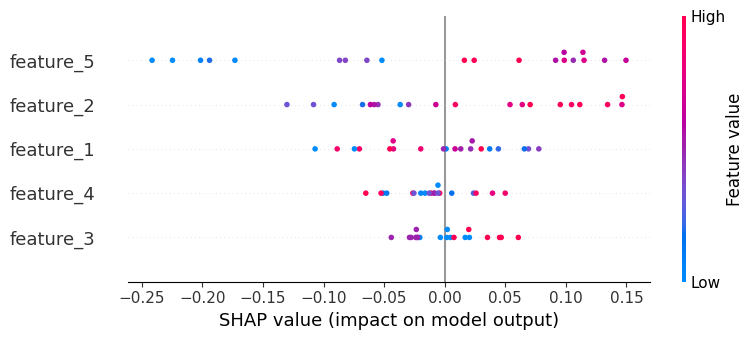

/tmp/ipykernel_73983/954196460.py:29: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:,:,0], X_test, feature_names=features_names, plot_type="bar")


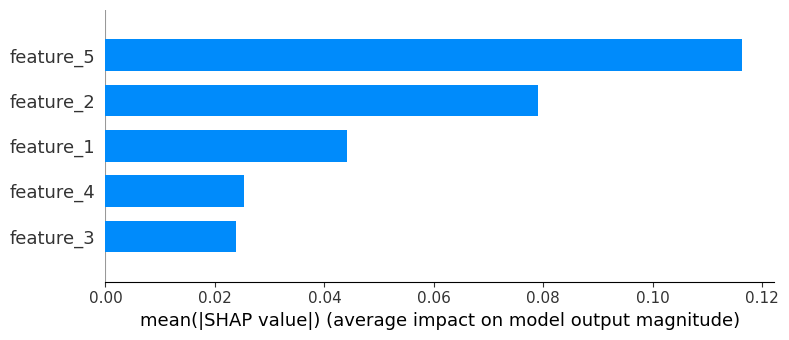

In [1]:
import numpy as np
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Generate sample data
np.random.seed(42)
features = pd.DataFrame({
    "feature_1": np.random.randint(18, 70, size=100),
    "feature_2": np.random.randint(30000, 100000, size=100),
    "feature_3": np.random.randint(1, 4, size=100), 
    "feature_4": np.random.randint(300, 850, size=100),
    "feature_5": np.random.randint(1000, 50000, size=100)
})
target = np.random.randint(0, 2, size=100)
features_names = features.columns.tolist()

# The following code is just like your example.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Adjust the dimensions of the shap_values object.
shap.summary_plot(shap_values[:,:,0], X_test, feature_names=features_names)
shap.summary_plot(shap_values[:,:,0], X_test, feature_names=features_names, plot_type="bar")

# Explaining a linear regression model

In [2]:
import sklearn

import shap

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [3]:
# Examining the model coefficients
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


# A more complete picture using partial dependence plots

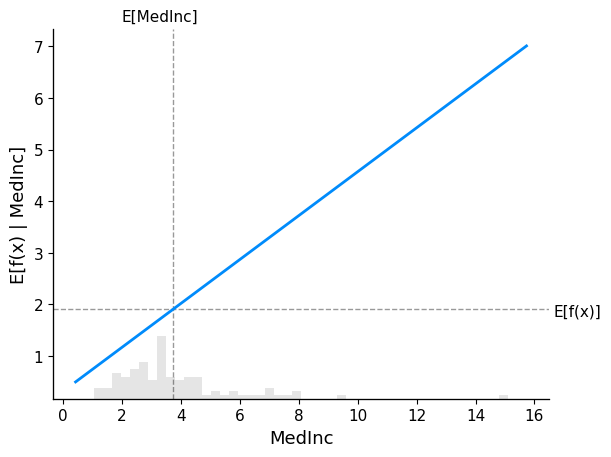

In [4]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

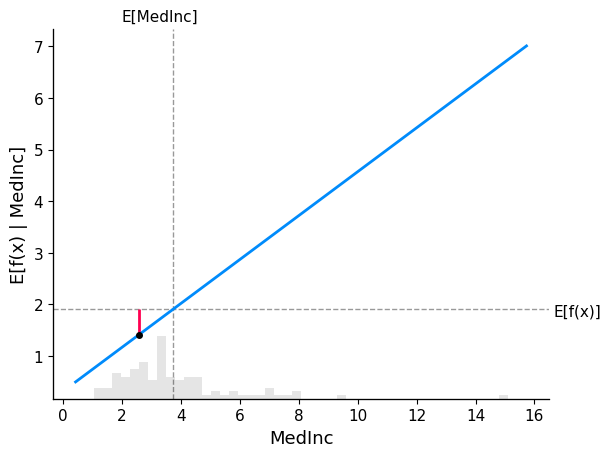

In [5]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

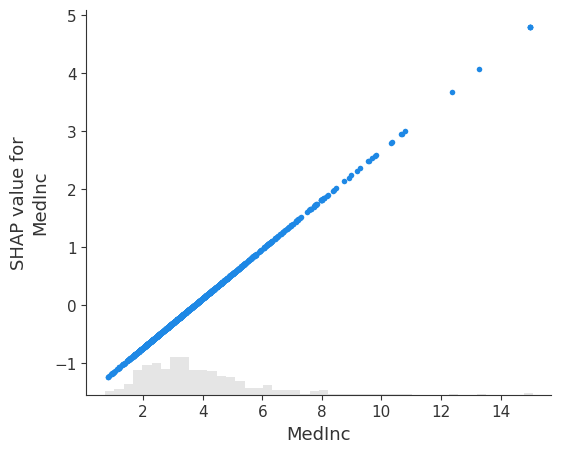

In [6]:
shap.plots.scatter(shap_values[:, "MedInc"])

# The additive nature of Shapley values

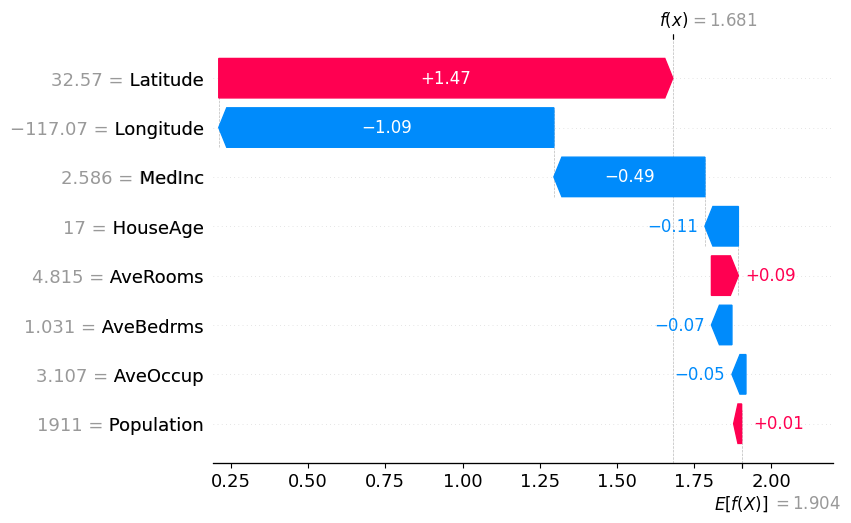

In [7]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

# Explaining an additive regression model

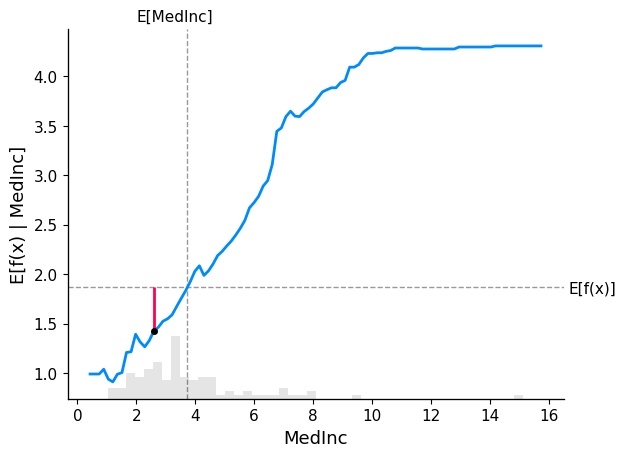

In [10]:
# fit a GAM model to the data
import interpret.glassbox

model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "MedInc",
    model_ebm.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_ebm[sample_ind : sample_ind + 1, :],
)

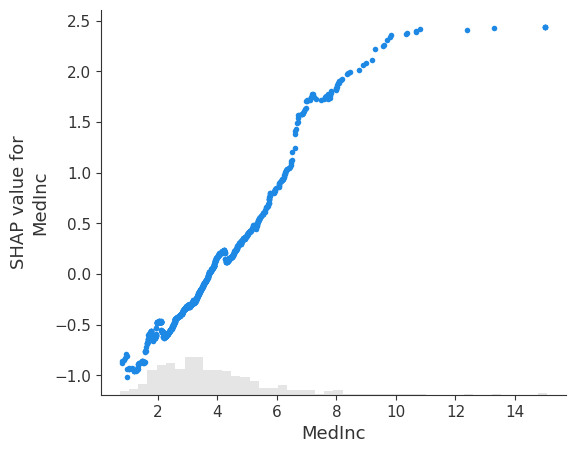

In [11]:
shap.plots.scatter(shap_values_ebm[:, "MedInc"])

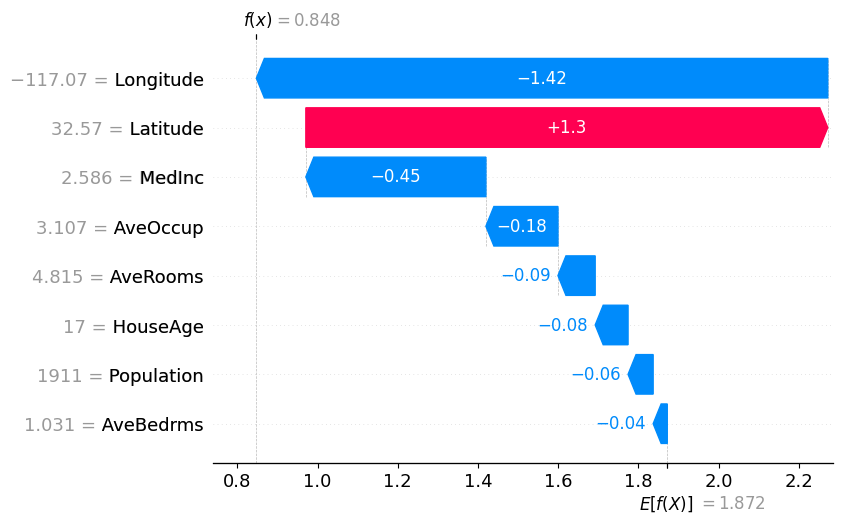

In [12]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind])

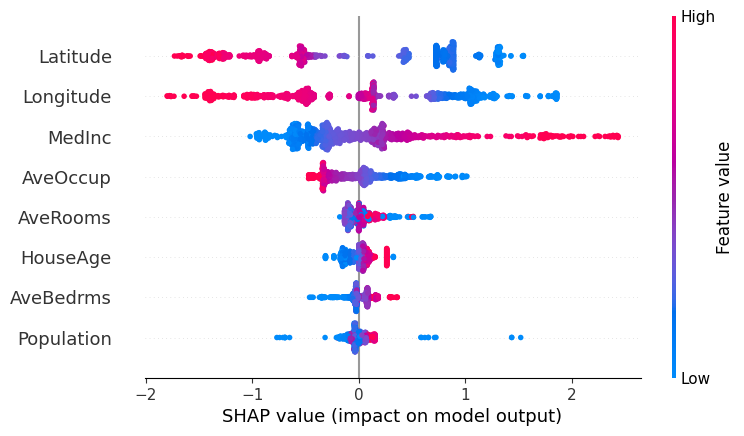

In [13]:
# the beeswarm plot displays SHAP values for each feature across all examples,
# with colors indicating how the SHAP values correlate with feature values
shap.plots.beeswarm(shap_values_ebm)

# Explaining a non-additive boosted tree model

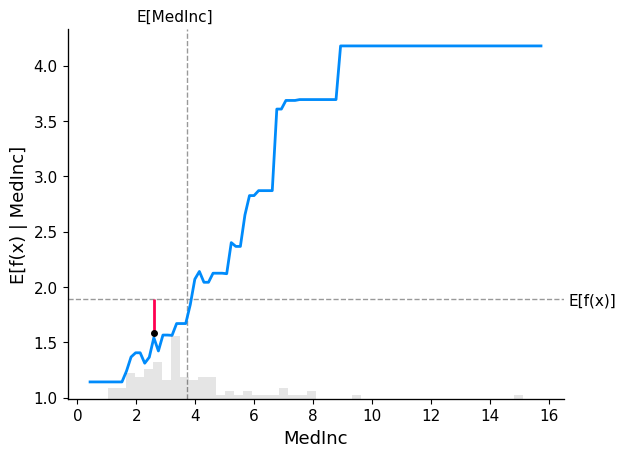

In [15]:
# train XGBoost model
import xgboost

model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "MedInc",
    model_xgb.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :],
)

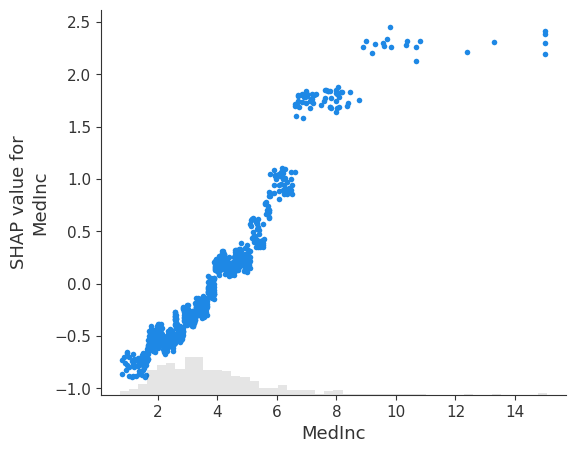

In [17]:
shap.plots.scatter(shap_values_xgb[:, "MedInc"])

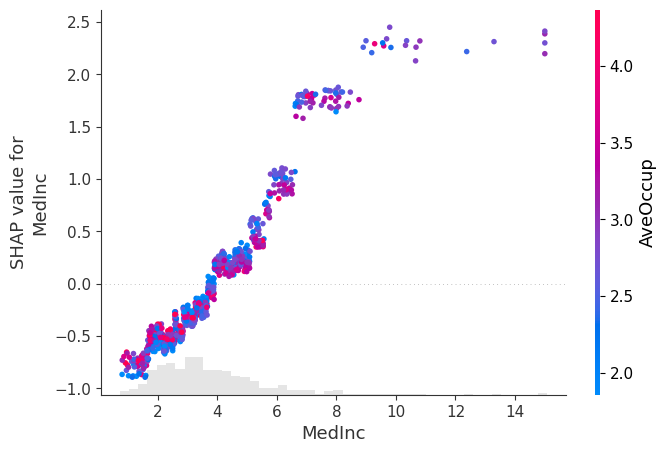

In [18]:
shap.plots.scatter(shap_values_xgb[:, "MedInc"], color=shap_values)

# Explaining a linear logistic regression model

In [21]:
# a classic adult census dataset price dataset
X_adult, y_adult = shap.datasets.adult()

# a simple linear logistic model
model_adult = sklearn.linear_model.LogisticRegression(max_iter=10000)
model_adult.fit(X_adult, y_adult)


def model_adult_proba(x):
    return model_adult.predict_proba(x)[:, 1]


def model_adult_log_odds(x):
    p = model_adult.predict_log_proba(x)
    return p[:, 1] - p[:, 0]

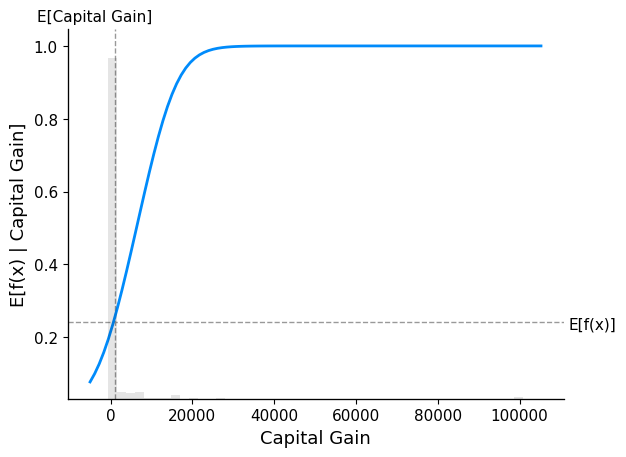

In [24]:
# make a standard partial dependence plot
sample_ind = 18
fig, ax = shap.partial_dependence_plot(
    "Capital Gain",
    model_adult_proba,
    X_adult,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
)

In [25]:
# compute the SHAP values for the linear model
background_adult = shap.maskers.Independent(X_adult, max_samples=100)
explainer = shap.Explainer(model_adult_proba, background_adult)
shap_values_adult = explainer(X_adult[:1000])

PermutationExplainer explainer: 1001it [00:16, 25.03it/s]                       


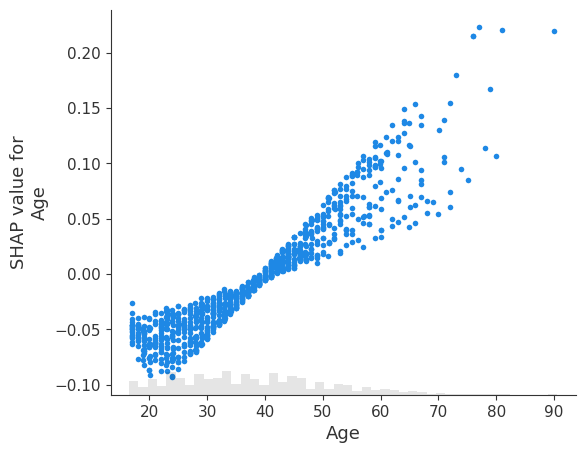

In [26]:
shap.plots.scatter(shap_values_adult[:, "Age"])

# Explaining a non-additive boosted tree logistic regression model

In [27]:
# train XGBoost model
model = xgboost.XGBClassifier(n_estimators=100, max_depth=2, eval_metric="logloss").fit(X_adult, y_adult * 1)

# compute SHAP values
explainer = shap.Explainer(model, background_adult)
shap_values = explainer(X_adult)

# set a display version of the data to use for plotting (has string values)
shap_values.display_data = shap.datasets.adult(display=True)[0].values

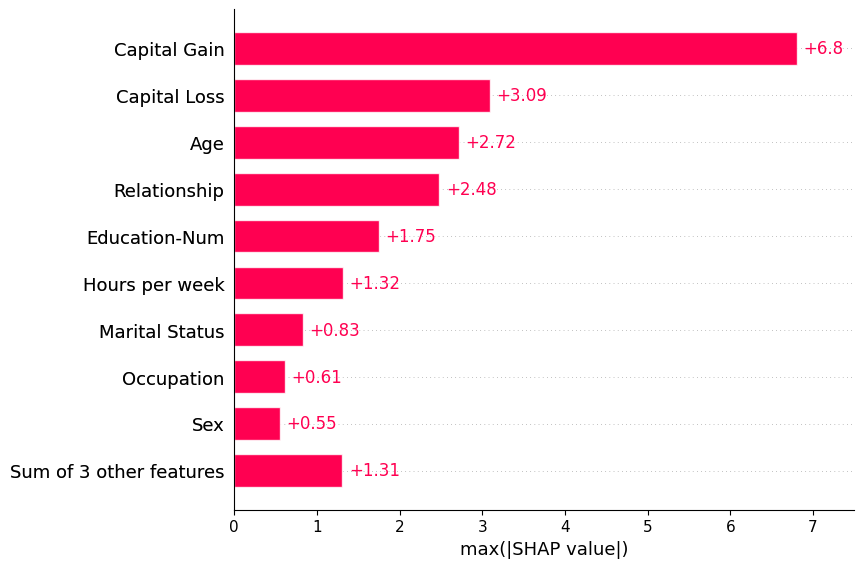

In [28]:
shap.plots.bar(shap_values.abs.max(0))

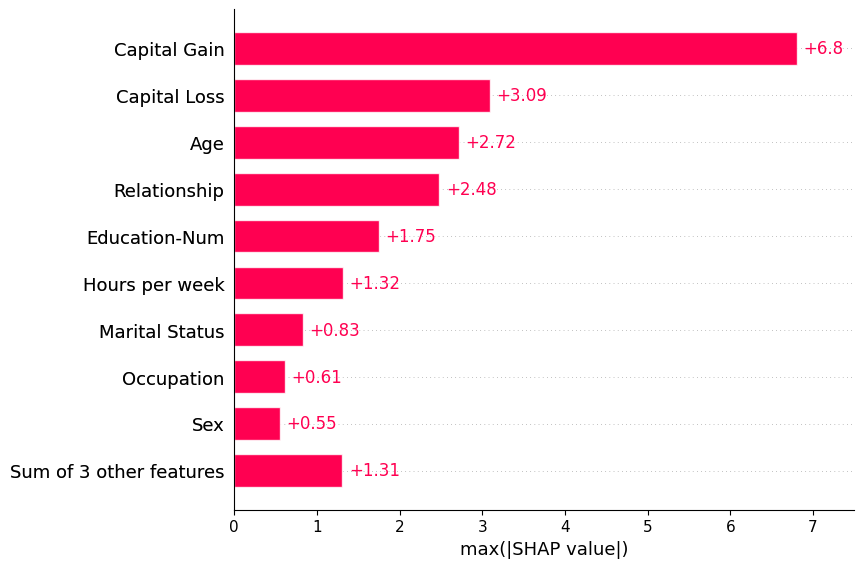

In [29]:
shap.plots.bar(shap_values.abs.max(0))

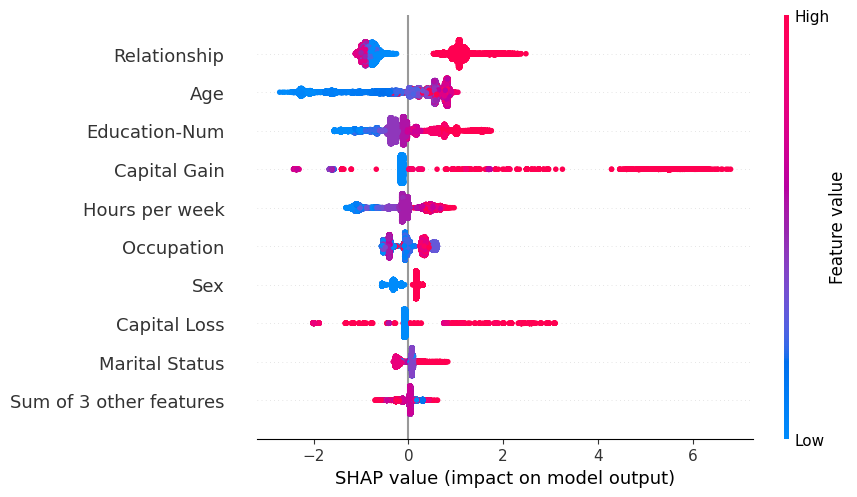

In [30]:
shap.plots.beeswarm(shap_values)

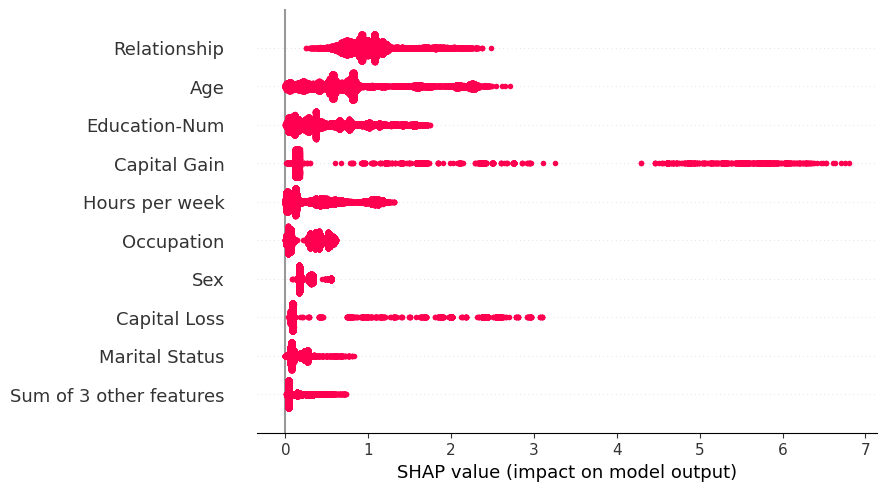

In [31]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

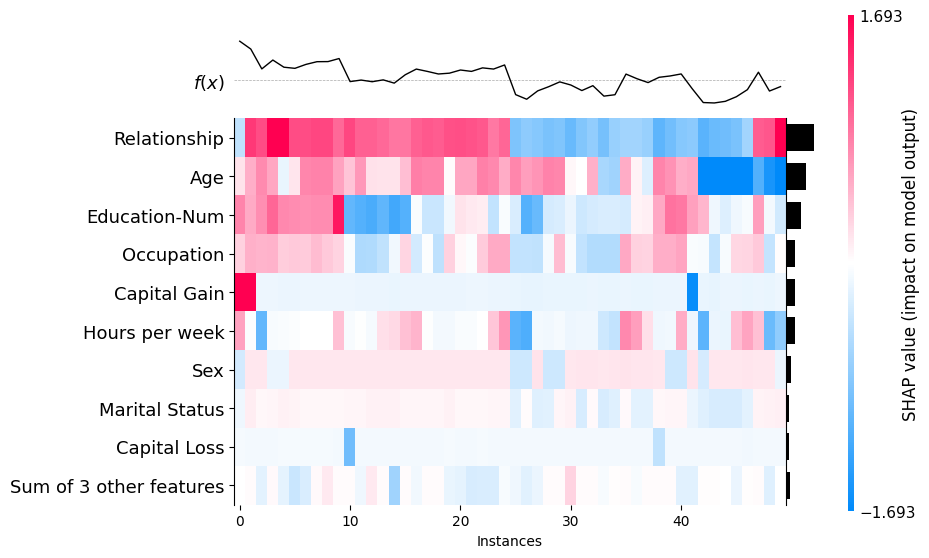

<Axes: xlabel='Instances'>

In [43]:
shap.plots.heatmap(shap_values[:50])

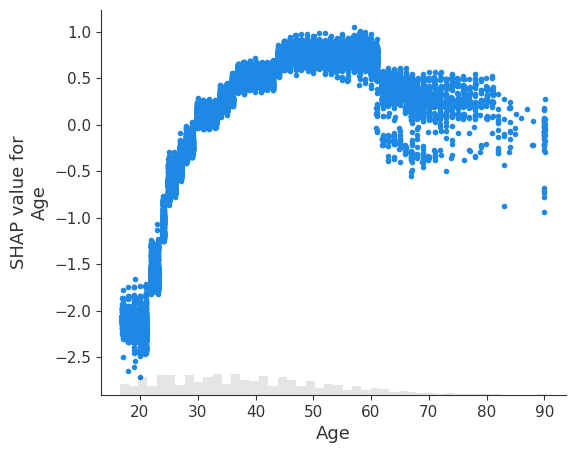

In [33]:
shap.plots.scatter(shap_values[:, "Age"])

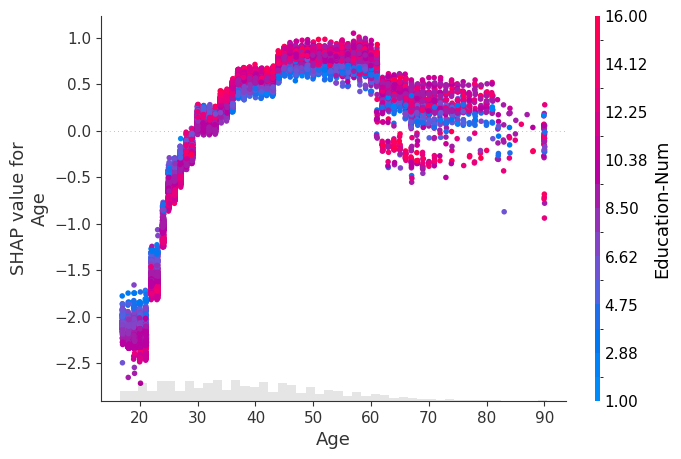

In [34]:
shap.plots.scatter(shap_values[:, "Age"], color=shap_values)

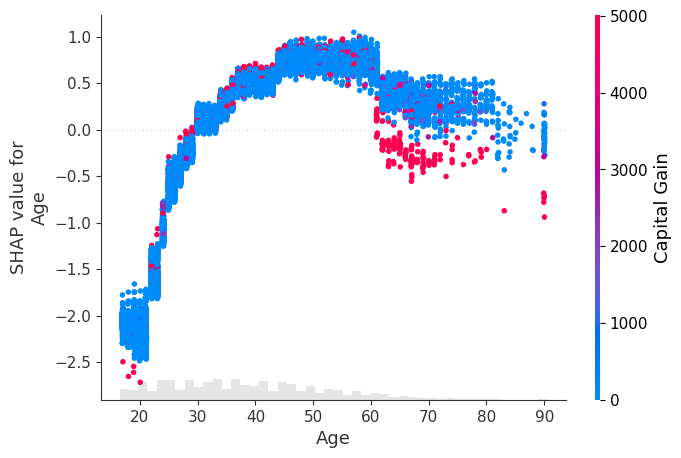

In [36]:
shap.plots.scatter(shap_values[:, "Age"], color=shap_values[:, "Capital Gain"])

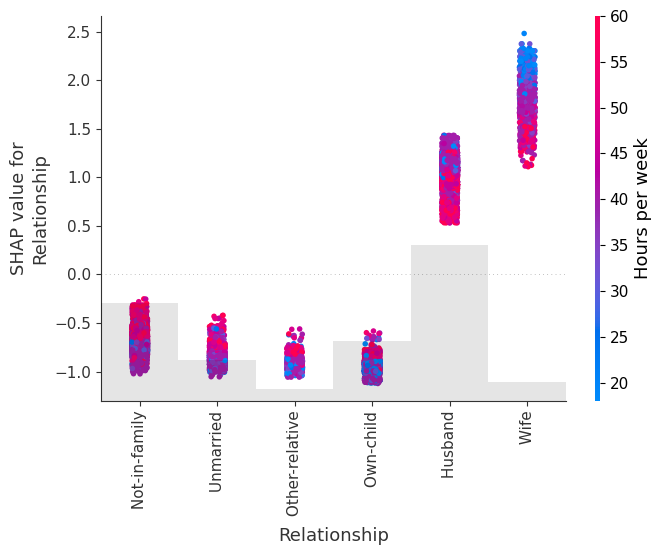

In [37]:
shap.plots.scatter(shap_values[:, "Relationship"], color=shap_values)

# Dealing with correlated features

In [38]:
clustering = shap.utils.hclust(X_adult, y_adult)

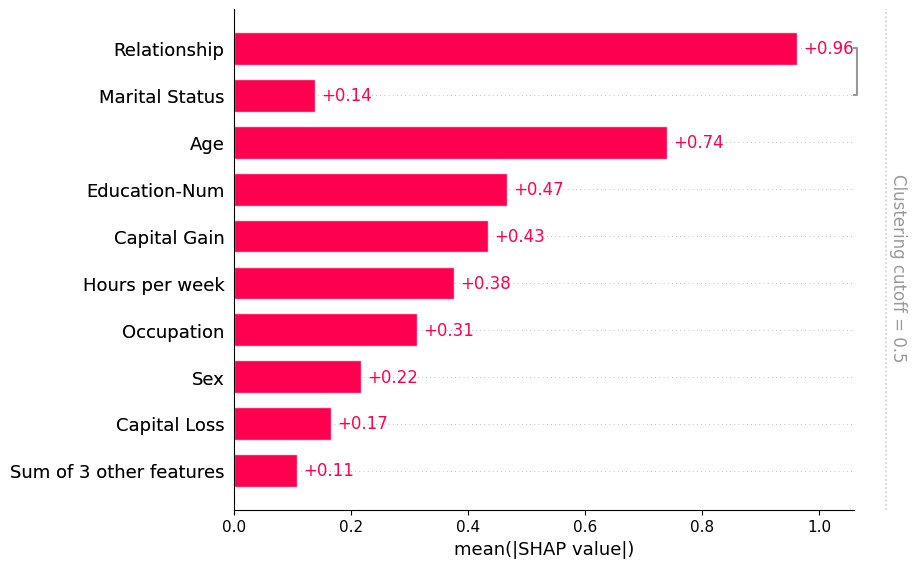

In [39]:
shap.plots.bar(shap_values, clustering=clustering)

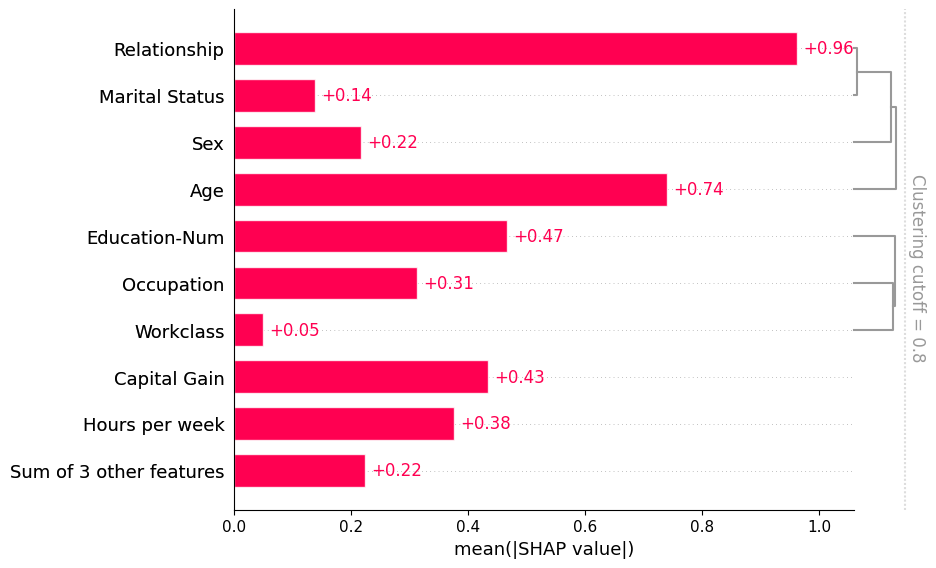

In [40]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.8)

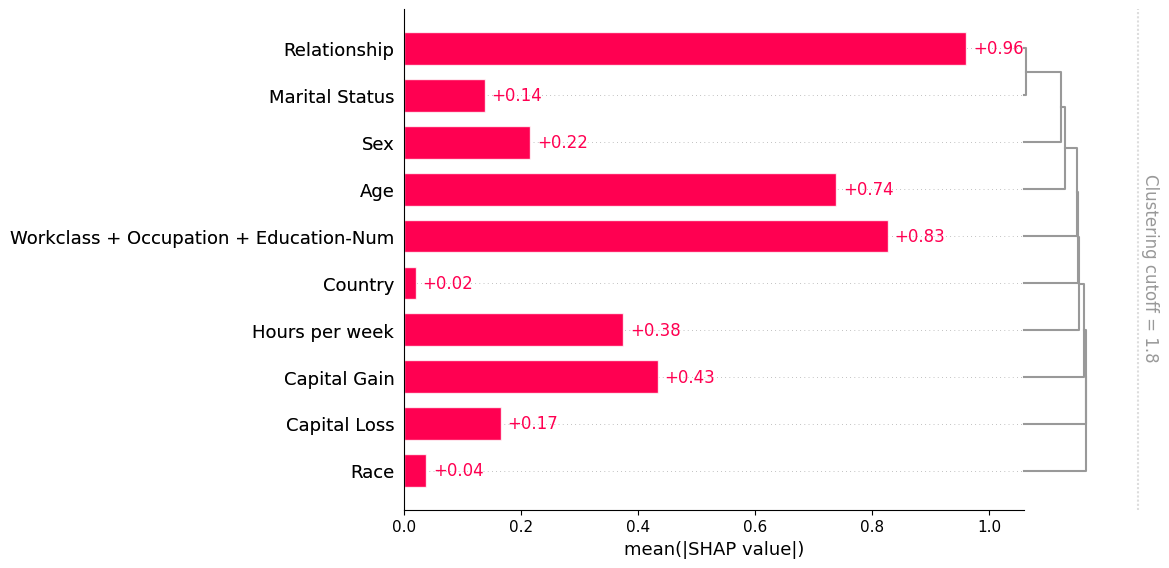

In [41]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=1.8)